<a href="https://colab.research.google.com/github/prog815/abscur_prediction/blob/master/20_ABS_2_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D0%B4%D0%BD%D0%B5%D0%B2%D0%BD%D1%8B%D1%85_%D0%BE%D1%80%D0%B4%D0%B5%D1%80%D0%BE%D0%B2_%D0%90%D0%B1%D1%81%D0%BE%D0%BB%D1%8E%D1%82%D0%BD%D1%8B%D0%B9_%D0%BA%D1%83%D1%80%D1%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **20-ABS-2. Обработка дневных ордеров. Абсолютный курс.**

**Абсолютный курс**

Енин А.В.

г. Оренбург

01.05.2020 г.

Сайт - http://www.abscur.ru

Twitter - https://twitter.com/abscurs

ВКонтакте -  https://vk.com/abscur

Одноклассники -  https://ok.ru/group/53547043520717

FB -  https://www.facebook.com/abscur 

Telegram - https://t.me/AbsCur

GitHub - https://github.com/prog815/abscur_prediction

WhatsUp - https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs

Viber - https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc

## Альбом

https://photos.app.goo.gl/yiVMbEg6qMb11xB9A

# Библиотеки



In [0]:
! pip install git+https://github.com/prog815/abscur
import abscur

  Cloning https://github.com/prog815/abscur to /tmp/pip-req-build-ktmlujwa
  Running command git clone -q https://github.com/prog815/abscur /tmp/pip-req-build-ktmlujwa
  Created wheel for abscur: filename=abscur-0.1.12-cp36-none-any.whl size=2920 sha256=2db49d8a958314ac396748a95d60240dfe9e036cbf1f740a36d2c9be42d3c0d6
  Stored in directory: /tmp/pip-ephem-wheel-cache-sd2f4akf/wheels/57/99/b6/8f8d84361b37a8789f91280c8e92720b9101beffb944cd32ab
Successfully built abscur


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

# Импорт данных

Таблица с историей абсолютных курсов: https://docs.google.com/spreadsheets/d/1_-cdNCIC6NgyRDj0zLJBaohXo-K8qCfxfDLbYq2JLhs/edit#gid=422799220

In [0]:
! pip install yfinance
import yfinance as yf

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=0c4aecd0bf6e251d99b5d0c28ee254a2dc2269ced6344e8a17bc08ee5f8f9577
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
gbpusd = yf.Ticker('GBPUSD=x')

In [0]:
hist = gbpusd.history('max')

In [0]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-12-01,1.7238,1.7272,1.7184,1.7186,0,0,0
2003-12-02,1.7190,1.7321,1.7173,1.7303,0,0,0
2003-12-03,1.7305,1.7318,1.7252,1.7281,0,0,0
2003-12-04,1.7274,1.7290,1.7183,1.7207,0,0,0
2003-12-05,1.7206,1.7331,1.7198,1.7331,0,0,0
...,...,...,...,...,...,...,...
2020-04-27,1.2369,1.2454,1.2361,1.2367,0,0,0
2020-04-28,1.2422,1.2518,1.2406,1.2423,0,0,0
2020-04-29,1.2434,1.2486,1.2390,1.2436,0,0,0


In [0]:
hist.Open.shape[0]

4268

# Расчет срабатываний ордеров

In [0]:
buy,sell = abscur.trading.get_order_set(hist,tp=0.007)

In [0]:
pd.Series(buy,dtype=int).value_counts()

0    2668
1    1600
dtype: int64

In [0]:
pd.Series(sell,dtype=int).value_counts()

0    2609
1    1659
dtype: int64

In [0]:
def order_res_to_profit(order_res,tp=0.01,sl=0.005):
    """
    функция получения финансового результата от отработки ордеров

    Параметры: 
    order_res - ряд результатов отработки ордера (0-неудачно, 1-удачно)
    tp - уровень TakeProfit (доля от единицы)
    sl - уровень StopLoss (доля от единицы)

    Результат:
    res - ряд результатов (относительных изменений) для каждого тика
    """
    res = np.zeros_like(order_res)
    res[order_res==1] = + tp
    res[order_res==0] = - sl
    return res

# Расчет доходности ордеров

In [0]:
buy_res = order_res_to_profit(buy,tp=0.007)
sell_res = order_res_to_profit(sell,tp=0.007)

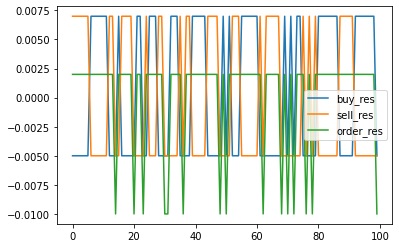

buy_res (mean=-0.0005014058106841613)
-0.005    2668
 0.007    1600
dtype: int64
sell_res (mean=-0.0003355201499531397)
-0.005    2609
 0.007    1659
dtype: int64
order_res (mean=-0.0008369259606373009)
 0.002    3259
-0.010    1009
dtype: int64


In [0]:
plt.plot(buy_res[-100:],label='buy_res')
plt.plot(sell_res[-100:],label='sell_res')
order_res = buy_res + sell_res
plt.plot(order_res[-100:],label='order_res')
plt.legend()
plt.show()
print('buy_res (mean={})'.format(buy_res.mean()))
print(pd.Series(buy_res).value_counts())
print('sell_res (mean={})'.format(sell_res.mean()))
print(pd.Series(sell_res).value_counts())
print('order_res (mean={})'.format(order_res.mean()))
print(pd.Series(order_res).value_counts())

# Ищем уровни для максимизации доходности

In [0]:
def test1(ohlc_df,tp,sl,dist):
    buy,sell = abscur.trading.get_order_set(ohlc_df,tp,sl,dist)
    buy_res = order_res_to_profit(buy,tp,sl)
    sell_res = order_res_to_profit(sell,tp,sl)
    order_res = buy_res + sell_res
    return order_res.mean()

In [0]:
test1(hist,tp=0.01,sl=0.005,dist=7)

-0.0007778819119025305

In [0]:
tp_cnt = 20
sl_cnt = 20
tp_set = np.linspace(0.0001,0.05,tp_cnt)
sl_set = np.linspace(0.0001,0.05,sl_cnt)
res = np.zeros((tp_cnt,sl_cnt))
for i in range(tp_cnt):
    for k in range(sl_cnt):
        res[i,k] = test1(hist,tp_set[i],sl_set[k],dist=7)
        print('tp={:.4f}, sl={:.4f}, res={:.4f}'.format(tp_set[i],sl_set[k],res[i,k]))
        
    

tp=0.0001, sl=0.0001, res=-0.0002
tp=0.0001, sl=0.0027, res=-0.0027
tp=0.0001, sl=0.0054, res=-0.0026
tp=0.0001, sl=0.0080, res=-0.0018
tp=0.0001, sl=0.0106, res=-0.0012
tp=0.0001, sl=0.0132, res=-0.0008
tp=0.0001, sl=0.0159, res=-0.0007
tp=0.0001, sl=0.0185, res=-0.0006
tp=0.0001, sl=0.0211, res=-0.0005
tp=0.0001, sl=0.0237, res=-0.0005
tp=0.0001, sl=0.0264, res=-0.0006
tp=0.0001, sl=0.0290, res=-0.0006
tp=0.0001, sl=0.0316, res=-0.0006
tp=0.0001, sl=0.0342, res=-0.0007
tp=0.0001, sl=0.0369, res=-0.0007
tp=0.0001, sl=0.0395, res=-0.0008
tp=0.0001, sl=0.0421, res=-0.0008
tp=0.0001, sl=0.0447, res=-0.0009
tp=0.0001, sl=0.0474, res=-0.0009
tp=0.0001, sl=0.0500, res=-0.0010
tp=0.0027, sl=0.0001, res=-0.0000
tp=0.0027, sl=0.0027, res=-0.0010
tp=0.0027, sl=0.0054, res=-0.0010
tp=0.0027, sl=0.0080, res=-0.0009
tp=0.0027, sl=0.0106, res=-0.0011
tp=0.0027, sl=0.0132, res=-0.0014
tp=0.0027, sl=0.0159, res=-0.0020
tp=0.0027, sl=0.0185, res=-0.0027
tp=0.0027, sl=0.0211, res=-0.0035
tp=0.0027, sl=

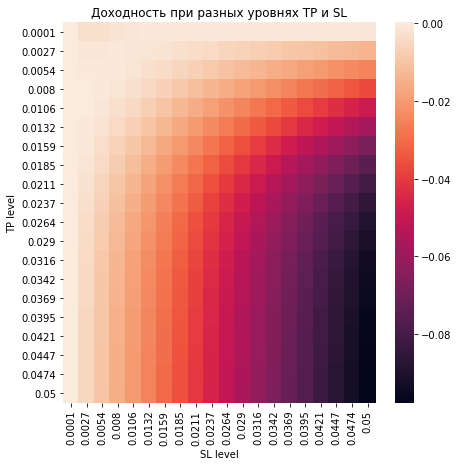

In [0]:
plt.figure(figsize=(7,7))
sns.heatmap(res,yticklabels=tp_set.round(4),xticklabels=sl_set.round(4))
plt.xlabel('SL level')
plt.ylabel('TP level')
plt.title('Доходность при разных уровнях TP и SL')
plt.show()

# Выводы

Максимальная доходность достигается, если в ордерах ставить SL на уровне 0.01% от уровня открытия и TP на уровне 0.5% от уровня открытия. 

По этой стратегии необходимо на каждом тике (начале торгового дня) открывать два ордера на продажу и на покупку с обозначенными выше TP и SL.

И тогда есть шанс получить доходность в 0.02% в среднем на один тик (день). 

Но скорее всего всю доходность съест комиссия.

В следующих экспериментах попробуем поточнее исследовать точку с максимальной доходностью. Еще не варьировали глубиной срабатывания ордера. Да и валютная пара была только одна. И с дневными тиками. Можно исследовать внутридневные.

Кроме того в библиотеку добавили два новых метода в новый созданный раздел "Трейдинг"